# Обработка и анализ фильмов 

Импортируем библиотеки для работы с данными

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Импортируем данные и выведем некоторые строки

In [5]:
df = pd.read_csv("Kinopoisk.csv")
df.head()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог..."
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени..."
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Название         500 non-null    object 
 1   Год              500 non-null    int64  
 2   Рейтинг          500 non-null    float64
 3   Длительность     500 non-null    int64  
 4   Ссылка на фильм  500 non-null    object 
 5   Описание         500 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 23.6+ KB


## Предварительная обработка данных

Очистим данных для их последующей векторизации:
* Приведение к нижнему регистру
* Очистка от латинских символов
* Очистка от пунктуации и спец символов
* Очистка от цифр
* Очистка от лишних пробеллов
* Очистка от стоп слов
* Токенизация
* Лемматизация

Импортируем библиотеки для предобработка данных

In [10]:
import re
import string

import nltk
import pymorphy3
import wordcloud

In [11]:
stopwords = nltk.corpus.stopwords.words("russian") + [
    "который", "весь", "всё", "это", "свой", "мочь", "история",
    "год", "человек", "самый", "день", "молодой", "хороший"
]

punctuation = string.punctuation + "—"
morph = pymorphy3.MorphAnalyzer()

Создадим функции для удобной обработки текста

In [13]:
def remove_punctuations(text: str) -> str:
    return "".join([char for char in text if char not in punctuation])

def remove_digits(text: str) -> str:
    return "".join([char for char in text if not char.isdigit()])

def remove_latinic(text: str) -> str:
    return re.sub("[a-z]", "", text)

def remove_multiple_spaces(text: str) -> str:
    return re.sub("\s+", " ", text)

def tokenize(text: str) -> list:
    return re.split("\W+", text)

def lemmatize(tokenized_text: list) -> list:
    return [morph.parse(word)[0].normal_form for word in tokenized_text]

def remove_stop_words(tokenized_text: list) -> list:
    return [word for word in tokenized_text if word not in stopwords]

def join_to_string(tokenized_text: list) -> str:
    return " ".join(tokenized_text)

Поочерёдно применим все эти функции

In [15]:
df["Предобработанный текст"] = df["Описание"].apply(lambda x: remove_punctuations(x.lower()))
df.head()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...",пострадав в результате несчастного случая бога...
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...",когда засуха пыльные бури и вымирание растений...
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинён в убийстве собс...
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,два американских судебных пристава отправляютс...
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,пол эджкомб начальник блока смертников в тюрь...


In [16]:
df["Предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: remove_digits(x))
df.head()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...",пострадав в результате несчастного случая бога...
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...",когда засуха пыльные бури и вымирание растений...
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинён в убийстве собс...
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,два американских судебных пристава отправляютс...
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,пол эджкомб начальник блока смертников в тюрь...


In [17]:
df["Предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: remove_latinic(x))
df.head()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...",пострадав в результате несчастного случая бога...
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...",когда засуха пыльные бури и вымирание растений...
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинён в убийстве собс...
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,два американских судебных пристава отправляютс...
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,пол эджкомб начальник блока смертников в тюрь...


In [18]:
df["Предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: remove_multiple_spaces(x))
df.head()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...",пострадав в результате несчастного случая бога...
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...",когда засуха пыльные бури и вымирание растений...
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинён в убийстве собс...
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,два американских судебных пристава отправляютс...
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,пол эджкомб начальник блока смертников в тюрьм...


In [19]:
df["Предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: tokenize(x))
df.head()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...","[пострадав, в, результате, несчастного, случая..."
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...","[когда, засуха, пыльные, бури, и, вымирание, р..."
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,"[бухгалтер, энди, дюфрейн, обвинён, в, убийств..."
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,"[два, американских, судебных, пристава, отправ..."
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,"[пол, эджкомб, начальник, блока, смертников, в..."


In [20]:
%%time
df["Предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: lemmatize(x))
df.head()

CPU times: total: 2.75 s
Wall time: 2.79 s


,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...","[пострадать, в, результат, несчастный, случай,..."
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...","[когда, засуха, пыльный, буря, и, вымирание, р..."
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,"[бухгалтер, энди, дюфрейн, обвинить, в, убийст..."
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,"[два, американский, судебный, пристав, отправл..."
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,"[пол, эджкомба, начальник, блок, смертник, в, ..."


In [21]:
df["Предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: remove_stop_words(x))
df.head()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...","[пострадать, результат, несчастный, случай, бо..."
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...","[засуха, пыльный, буря, вымирание, растение, п..."
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,"[бухгалтер, энди, дюфрейн, обвинить, убийство,..."
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,"[американский, судебный, пристав, отправляться..."
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,"[пол, эджкомба, начальник, блок, смертник, тюр..."


In [22]:
%%time
df["Предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: join_to_string(x))
df.head()

CPU times: total: 0 ns
Wall time: 996 μs


,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст
0,1+1,2011,8.4,112,https://www.kinopoisk.ru/film/535341/,"Пострадав в результате несчастного случая, бог...",пострадать результат несчастный случай богатый...
1,Интерстеллар,2014,8.3,169,https://www.kinopoisk.ru/film/258687/,"Когда засуха, пыльные бури и вымирание растени...",засуха пыльный буря вымирание растение приводи...
2,Побег из Шоушенка,1994,8.2,142,https://www.kinopoisk.ru/film/326/,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинить убийство собст...
3,Остров проклятых,2009,8.1,138,https://www.kinopoisk.ru/film/397667/,Два американских судебных пристава отправляютс...,американский судебный пристав отправляться ост...
4,Зеленая миля,1999,8.1,189,https://www.kinopoisk.ru/film/435/,Пол Эджкомб — начальник блока смертников в тюр...,пол эджкомба начальник блок смертник тюрьма хо...


Теперь, после предварительной обработки текста можно отобразить облоко слов и расширить список стом слов.

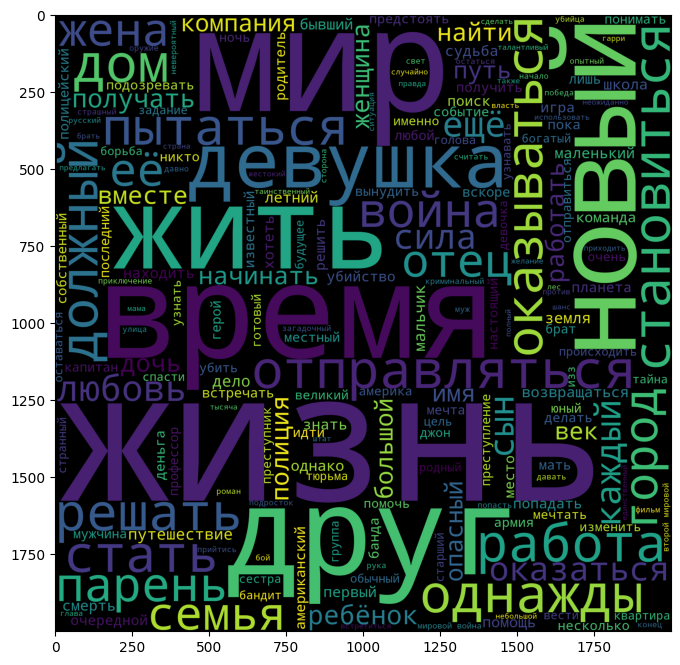

CPU times: total: 5.36 s
Wall time: 5.48 s


In [24]:
%%time
from wordcloud import WordCloud

text = " ".join(word for word in df["Предобработанный текст"])

plt.figure(figsize=(8, 8))
plt.imshow(WordCloud(background_color="black", width=2000, height=2000, random_state=42).generate(text))
plt.show()

## Векторизация

In [27]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Предобработанный текст"])

CPU times: total: 15.6 ms
Wall time: 29.1 ms


In [28]:
tfidf_matrix.shape

(500, 6213)

In [29]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['аарон', 'аббат', 'абдулл', 'абрамс', 'абсолютно', 'абсолютный',
       'абсурдный', 'авантюрист', 'авария', 'август', 'авиаконструктор',
       'авиалиния', 'авиация', 'аврелий', 'автобанда', 'автобиография',
       'автобус', 'автобусный', 'автограф', 'автокатастрофа',
       'автоконструктор', 'автомат', 'автомеханик', 'автомобиль',
       'автомобильный', 'автопокрышка', 'автор', 'авторитет',
       'авторитетный', 'агамемнон', 'агент', 'агентство', 'агрессивный',
       'ад', 'адалин', 'адам', 'адвокат', 'адил', 'адольф', 'адрес',
       'адриан', 'адриана', 'азиатский', 'азкабан', 'аиша', 'айова',
       'айрис', 'айсберг', 'ак', 'академия', 'акитаин', 'аккуратно',
       'акт', 'активистка', 'активно', 'активный', 'актёр', 'акция',
       'алан', 'албанский', 'алгоритм', 'алекс', 'александр', 'алексей',
       'алеш', 'алиби', 'алкоголь', 'алмаата', 'алмаз', 'алонзый',
       'алтарь', 'альгрена', 'альма', 'альтернативный', 'альфред',
       'аманда', 'амано', 'амели', 'а

## Кластеризация

Теперь, так как текст векторизирован, можно кластеризировать данные

Для кластеризации будем использовать модель KMeans. Алгоритм k-means используют для группировки объектов в кластеры на основе их схожести. В основе работы k-means лежит принцип минимизации расстояния между объектами внутри одного кластера.

Основные преимущества k-means это простота и быстрота реализации, а так же эффективность при работе с большими наборами данных

Для начала уменьшим размерность матрицы. Это упростит обучение моделей путём уменьшения вычислительной сложности

In [34]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

nmf_model = NMF(n_components=5, random_state=0)
W = nmf_model.fit_transform(tfidf_matrix)

In [35]:
%%time

cluster_range = range(1, 25)
wcss = []

# Обучаем модели несколько раз
for i in cluster_range:
    # Создаём и обучем модель
    kmeans = KMeans(n_clusters=i, n_init=10, init="k-means++", random_state=42).fit(W)
    wcss.append(kmeans.inertia_)

CPU times: total: 5.8 s
Wall time: 1.48 s


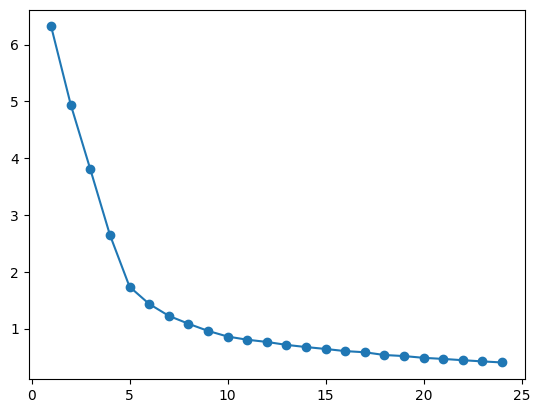

In [36]:
plt.plot(cluster_range, wcss, marker="o")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)
labels = kmeans.fit_predict(W)
centers = kmeans.cluster_centers_

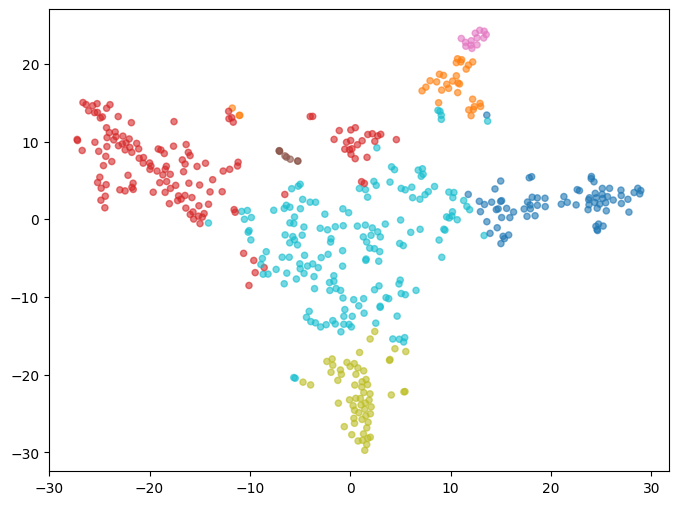

In [39]:
from sklearn.manifold import TSNE

x_tsne = TSNE(n_components=2, random_state=42).fit_transform(W)

plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=labels, s=20, cmap="tab10", alpha=0.6)
plt.show()

По данному графику распределения видно, что 1 кластер расположен на большом удалении и содержат малое количество записей.
Добавим кластеры в исходный набор данных

Добавим информацию о принадлежности к кластеру в набор данных

In [42]:
df["cluster"] = labels
df.sample()

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст,cluster
487,Индиана Джонс: В поисках утраченного ковчега,1981,6.9,115,https://www.kinopoisk.ru/film/339/,Известный археолог и специалист по оккультным ...,известный археолог специалист оккультный наука...,5


Выведем распределение кластеров

In [44]:
df["cluster"].value_counts()

cluster
6    169
2    142
0     76
5     60
1     32
4     13
3      8
Name: count, dtype: int64

Теперь выведем несколько записей для каждого кластера

In [46]:
pd.set_option("display.max_colwidth", None)

for i in range(7):
    print(f"cluster: {i}: ")
    print(f"{df[df["cluster"] == i].sample(2)[["Название", "Описание"]].values}\n")

cluster: 0: 
[['Планета Ка-Пэкс'
  'В Манхэттенский психиатрический институт привозят странного человека в черных очках. Он зовет себя Протом и утверждает, что его родина — далекая планета Ка-Пэкс, откуда он мгновенно перенесся на Землю в луче света. Несмотря на все усилия, опытному доктору Пауэллу не удается разгадать загадку таинственного пациента, который охотно и весьма убедительно доказывает всем свое внеземное происхождение и заранее назначает дату своего возвращения на Ка-Пэкс.']
 ['Звёздные войны: Эпизод 3 – Месть ситхов'
  'Идёт третий год Войн клонов. Галактическая Республика, некогда бывшая спокойным и гармоничным государством, превратилась в поле битвы между армиями клонов, возглавляемых канцлером Палпатином, и армадами дроидов, которых ведёт граф Дуку, тёмный лорд ситхов. Республика медленно погружается во тьму. Лишь рыцари-джедаи, защитники мира и справедливости, могут противостоять злу, которое вскоре поглотит галактику. Но настоящая битва идёт в душе у молодого рыцаря-д

## Тематическое моделирование

Импортируем библиотеки для тематического моделирования

In [49]:
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [51]:
%%time
df["Токенизированный предобработанный текст"] = df["Предобработанный текст"].apply(lambda x: tokenize(x))

gensim_dictionary = gensim.corpora.Dictionary(df["Токенизированный предобработанный текст"])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=5)
gensim_dictionary.compactify()

corpus = [gensim_dictionary.doc2bow(text) for text in df["Токенизированный предобработанный текст"]]
topics_range = range(3, 25, 1)
coherence_values = []

for num_topics in topics_range:
    lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        num_topics=num_topics,
        id2word=gensim_dictionary,
        passes=10,
        random_state=42)
    
    coherence_model = gensim.models.CoherenceModel(
        model=lda_model,
        texts=df["Токенизированный предобработанный текст"],
        dictionary=gensim_dictionary,
        coherence="c_v")
    
    coherence_values.append(coherence_model.get_coherence())

CPU times: total: 1min 32s
Wall time: 5min 27s


Восмользуемся NMF (Non-negative Matrix Factorization) для определения скрытых тем

In [56]:
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {", ".join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, друг, дом, девушка, однажды, жить, стать, любовь, отец, ребёнок
Topic 1: война, мировой, второй, время, американский, фильм, машина, событие, первый, рассказывать
Topic 2: гарри, школа, хогвартс, поттер, чародейство, волшебство, курс, волшебник, возвращаться, опасность
Topic 3: мир, земля, сила, планета, бой, вынудить, остаться, живой, человечество, уничтожить
Topic 4: полиция, полицейский, банда, убийца, преступление, город, опасный, убить, схватка, убийство


In [58]:
lda = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=gensim_dictionary, passes=10, random_state=42)
vis_data = gensimvis.prepare(lda, corpus, gensim_dictionary)
pyLDAvis.display(vis_data)

In [60]:
for i in range(7):
    gensim_dictionary = gensim.corpora.Dictionary(df.loc[df["cluster"].isin([i]), "Токенизированный предобработанный текст"])
    doc_count = len(df.loc[df["cluster"].isin([i]), "Токенизированный предобработанный текст"])

    if doc_count >= 100:
        gensim_dictionary.filter_extremes(no_above=0.1, no_below=5)
    elif doc_count >= 50:
        gensim_dictionary.filter_extremes(no_above=0.3, no_below=3)
    else:
        gensim_dictionary.filter_extremes(no_above=0.5, no_below=2)
        
    gensim_dictionary.compactify()

    corpus = [gensim_dictionary.doc2bow(text) for text in df.loc[df["cluster"].isin([i]), "Токенизированный предобработанный текст"]]
    lda = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=gensim_dictionary, passes=10, random_state=42)

    print(f"\nТемы кластера {i}:")
    
    for j in lda.print_topics():
        print(j)


Темы кластера 0:
(0, '0.054*"планета" + 0.034*"земля" + 0.027*"живой" + 0.023*"путешествие" + 0.023*"остаться" + 0.021*"космический" + 0.018*"готовый" + 0.017*"новый" + 0.016*"должный" + 0.016*"вынудить"')
(1, '0.038*"земля" + 0.027*"сила" + 0.027*"пытаться" + 0.025*"команда" + 0.023*"большой" + 0.022*"бой" + 0.018*"вести" + 0.018*"новый" + 0.018*"победа" + 0.015*"невероятный"')
(2, '0.027*"планета" + 0.027*"найти" + 0.027*"человечество" + 0.027*"сила" + 0.027*"смерть" + 0.027*"невероятный" + 0.026*"странный" + 0.018*"мальчик" + 0.018*"остаться" + 0.018*"пытаться"')
(3, '0.034*"вынудить" + 0.030*"решить" + 0.030*"сила" + 0.025*"" + 0.024*"смерть" + 0.024*"битва" + 0.024*"бой" + 0.019*"пока" + 0.018*"любовь" + 0.018*"предстоять"')
(4, '0.043*"гном" + 0.031*"бильбо" + 0.031*"опасный" + 0.025*"путешествие" + 0.025*"хоббит" + 0.025*"сила" + 0.025*"волшебник" + 0.019*"оказаться" + 0.019*"герой" + 0.019*"воин"')

Темы кластера 1:
(0, '0.111*"время" + 0.041*"разный" + 0.032*"ход" + 0.032*"ве

Проанализировав полученный результат, по полученным словам можно выделить следующие темы:
* "Городской криминал / Драма"
* "Дружба / Любовь / Испытания"
* "Космические путешествия / Приключения / Судьба"
* "Магия / Волшебство / Эпическая борьба"
* "Война / Мужская доблесть"
* "Любовь / Семейные отношения"
* "Современная жизнь / Преступность / Социальные драмы"

Добавим в набор данный информацию о принадлежности к теме

In [63]:
df["cluster name"] = df["cluster"].map({
    0: "Городской криминал / Драма",
    1: "Дружба / Любовь / Испытания",
    2: "Космические путешествия / Приключения / Судьба",
    3: "Магия / Волшебство / Эпическая борьба",
    4: "Война / Мужская доблесть",
    5: "Любовь / Семейные отношения",
    6: "Современная жизнь / Преступность / Социальные драмы",
})

In [64]:
df["cluster name"].value_counts()

cluster name
Современная жизнь / Преступность / Социальные драмы    169
Космические путешествия / Приключения / Судьба         142
Городской криминал / Драма                              76
Любовь / Семейные отношения                             60
Дружба / Любовь / Испытания                             32
Война / Мужская доблесть                                13
Магия / Волшебство / Эпическая борьба                    8
Name: count, dtype: int64

In [65]:
df.to_csv("Kinopoisk (cluster).csv", index=False)

In [66]:
pd.set_option("display.max_colwidth", 50)

In [67]:
df = pd.read_csv("Kinopoisk (cluster).csv")
df.sample(1)

,Название,Год,Рейтинг,Длительность,Ссылка на фильм,Описание,Предобработанный текст,cluster,Токенизированный предобработанный текст,cluster name
34,Шрэк,2001,7.7,90,https://www.kinopoisk.ru/film/430/,Жил да был в сказочном государстве большой зел...,жить сказочный государство большой зелёный вел...,6,"['жить', 'сказочный', 'государство', 'большой'...",Современная жизнь / Преступность / Социальные ...


## Классификация

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(W, df["cluster"], test_size=0.33, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)

(335, 5)
(165, 5)


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Далее обучим каждую модель

In [77]:
%%time
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train);
rfc_predict = rfc.predict(X_test)

CPU times: total: 141 ms
Wall time: 154 ms


In [78]:
%%time
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train);
dtc_predict = dtc.predict(X_test)

CPU times: total: 0 ns
Wall time: 1.99 ms


In [79]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);
knn_predict = knn.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 14 ms


Модели обучены, теперь сравним их метрики

Для оценки качества моделей необходимо понимать метрики оценки моделей.

Precision и Recall можно описать следующим образом: 
* Precision - "Сколько выбранных элементов являются релевантными"
* Recall - "Сколько релевантных элементов выбранно"

Precision демонстрирует способность алгоритма отличать один класс от других классов,
а Recall демонстрирует способность алгоритма обнаруживать данный класс.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

F1-score — это гармоническое среднее между Precision и Recall, которое используется для оценки баланса между точностью и полнотой модели.
Он особенно полезен в задачах с несбалансированными классами. 

Поскольку классы несбалансированными, для оценки качества обучения, как основную метрику, будем использовать F1-score.

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         9
           2       0.94      0.92      0.93        52
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         4
           5       1.00      0.93      0.97        15
           6       0.88      0.95      0.91        56

    accuracy                           0.94       165
   macro avg       0.83      0.83      0.83       165
weighted avg       0.93      0.94      0.93       165



In [85]:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.90      1.00      0.95         9
           2       0.92      0.88      0.90        52
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       1.00      0.80      0.89        15
           6       0.88      0.93      0.90        56

    accuracy                           0.92       165
   macro avg       0.95      0.87      0.90       165
weighted avg       0.92      0.92      0.91       165



In [86]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         9
           2       0.94      0.94      0.94        52
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      0.87      0.93        15
           6       0.91      0.95      0.93        56

    accuracy                           0.95       165
   macro avg       0.98      0.97      0.97       165
weighted avg       0.95      0.95      0.95       165



Knn продемонстрировал очень хорошие результаты, показав самый высокий accuracy